<a href="https://colab.research.google.com/github/shernandezg20/practica01InteligenciaArtificial/blob/main/Practica_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Primera-práctica:-Introducción-a-las-redes-neuronales-con-Keras" data-toc-modified-id="Primera-práctica:-Introducción-a-las-redes-neuronales-con-Keras-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Primera práctica: Introducción a las redes neuronales con Keras</a></span><ul class="toc-item"><li><span><a href="#1.-Información-sobre-el-dataset" data-toc-modified-id="1.-Información-sobre-el-dataset-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>1. Información sobre el dataset</a></span></li><li><span><a href="#2.-Entrenamiento-de-una-red-neuronal-simple" data-toc-modified-id="2.-Entrenamiento-de-una-red-neuronal-simple-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>2. Entrenamiento de una red neuronal simple</a></span></li><li><span><a href="#3.-Evaluación-del-modelo-en-datos-de-test" data-toc-modified-id="3.-Evaluación-del-modelo-en-datos-de-test-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>3. Evaluación del modelo en datos de test</a></span></li></ul></li></ul></div>

# Primera práctica: Introducción a las redes neuronales con Keras

En esta primera práctica, vamos a utilizar una red neuronal para clasificar imágenes de prendas de ropa. Para ello, utilizaremos Keras con TensorFlow.

El dataset a utilizar es Fashion MNIST, un problema sencillo con imágenes pequeñas de ropa, pero más interesante que el dataset de MNIST. Puedes consultar más información sobre el dataset en [este enlace](https://github.com/zalandoresearch/fashion-mnist).

El código utilizado para contestar tiene que quedar claramente reflejado en el Notebook. Puedes crear nuevas cells si así lo deseas para estructurar tu código y sus salidas. A la hora de entregar el notebook, **asegúrate de que los resultados de ejecutar tu código han quedado guardados** (por ejemplo, a la hora de entrenar una red neuronal tiene que verse claramente un log de los resultados de cada epoch).

In [ ]:
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Primero, vamos a obtener los datos. Por suerte para nosotros, estos pueden ser descargados directamente desde Keras, por lo que no tendremos que preocuparnos de tratar con ficheros.

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Acto seguido, normalizamos esos datos de manera similar a como hemos visto con MNIST, obteniendo valores entre 0 y 1. Este paso es muy importante para el correcto funcionamiento de nuestra red.

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

## 1. Información sobre el dataset

Una vez tenemos los datos cargados en memoria, vamos a obtener información sobre los mismos.

**Pregunta 1.1 *(0.5 puntos)*** ¿Cuántas imágenes hay de *training* y de *test*? ¿Qué tamaño tienen las imágenes?

In [ ]:
### Tu código aquí ###
print("Tamaño de x_train:", x_train.shape)
print("Tamaño de x_test:", x_test.shape)


Tamaño de x_train: (60000, 28, 28)
Tamaño de x_test: (10000, 28, 28)


Hay 60,000 imágenes de entrenamiento y 10,000 imágenes de test.

Cada imagen tiene un tamaño de 28x28 píxeles.*Tu respuesta aquí*

**Pregunta 1.2 *(0.5 puntos)*** Realizar una exploración de las variables que contienen los datos. Describir en qué consiste un example del dataset (qué información se guarda en cada imagen) y describir qué contiene la información en y.

In [ ]:
### Tu código aquí ###
# Ejemplo de un dato
print("Ejemplo de imagen (x_train[0]):")
print(x_train[0])
print("Etiqueta correspondiente (y_train[0]):", y_train[0])


Ejemplo de imagen (x_train[0]):
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0

*Tu respuesta aquí*
*   Cada imagen es una matriz de 28x28 píxeles con valores de intensidad en escala de grises.
*   La variable y contiene la etiqueta numérica (0-9) que representa la clase de

prenda. Ejemplo: 0 = camiseta, 1 = pantalón, etc.


Vamos a **visualizar** una imagen de ejemplo. Prueba tu mismo a cambiar la imagen en uso para explorar el dataset visualmente ejecutando el siguiente código:

In [ ]:
def visualize_example(x):
    plt.figure()
    plt.imshow(x)
    plt.colorbar()
    plt.grid(False)
    plt.show()

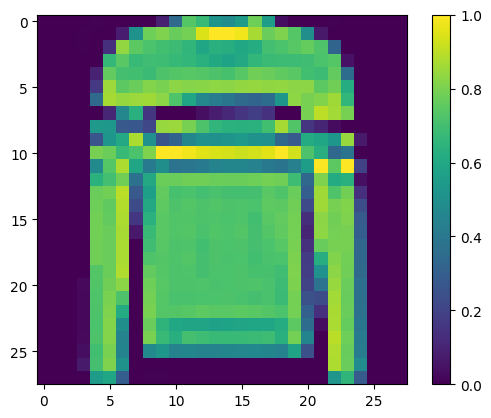

In [ ]:
visualize_example(x_train[5])

## 2. Entrenamiento de una red neuronal simple

**Pregunta 2 *(7.0 puntos)***. Utilizando Keras, y preparando los datos de X e y como fuera necesario, define y entrena una red neuronal que sea capaz de clasificar imágenes de Fashion MNIST con las siguientes características:

* Dos hidden layers de tamaños 128 y 64, utilizando unidades **sigmoid**
* Optimizador **sgd**.
* Durante el entrenamiento, la red tiene que mostrar resultados de **loss** y **accuracy** por cada epoch.
* La red debe entrenar durante **20 epochs** y batch size de **64**.
* La última capa debe de ser una capa **softmax**.

Tu red tendría que ser capaz de superar fácilmente 60% de accuracy.

In [ ]:
### Tu código aquí ###
# Aplanar las imágenes (28x28 -> 784) para usar en capas densas
x_train_flat = x_train.reshape(-1, 28*28)
x_test_flat = x_test.reshape(-1, 28*28)

# Crear el modelo secuencial
model = Sequential([
    Dense(128, activation='sigmoid', input_shape=(784,)),
    Dense(64, activation='sigmoid'),
    Dense(10, activation='softmax')  # 10 clases
])

# Compilar el modelo
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(x_train_flat, y_train, epochs=20, batch_size=64, verbose=1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.2590 - loss: 2.2650
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4932 - loss: 1.9468
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5462 - loss: 1.5518
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6075 - loss: 1.2947
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6444 - loss: 1.1354
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6758 - loss: 1.0351
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6914 - loss: 0.9495
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7086 - loss: 0.8781
Epoch 9/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7196 - loss: 0.8237
Epoch 10/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7292 - loss: 0.7799
Epoch 11/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7366 - loss: 0.7424
Epoch 12/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step

## 3. Evaluación del modelo en datos de test

Una vez hemos entrenado nuestro modelo, vamos a evaluarlo en los datos de test de Fashion MNIST.

**Pregunta 3.1 *(1.0 puntos)***. Utilizando el modelo recién entrenado, obtener la accuracy resultante en el dataset de test.

In [ ]:
### Tu código aquí ###

test_loss, test_accuracy = model.evaluate(x_test_flat, y_test, verbose=2)
print(f"\nAccuracy en test: {test_accuracy:.4f}")


313/313 - 1s - 2ms/step - accuracy: 0.7849 - loss: 0.5935

Accuracy en test: 0.7849


**Pregunta 3.2 *(1.0 puntos)***. Utilizando el método **predict** de Keras, realizar predicciones para los datos de test. Por cada predicción resultante, ¿qué significan los números que obtenemos al hacer predict? ¿Cómo podemos obtener el valor de la clase resultante? (recordar que estamos utilizando una capa softmax para clasificar).

In [ ]:
### Tu código aquí ###
# Realizar predicciones
predictions = model.predict(x_test_flat)

# Mostrar la predicción para el primer ejemplo de test
print("Vector de predicción para la imagen 0:", predictions[0])

# Obtener la clase predicha
predicted_class = np.argmax(predictions[0])
print("Clase predicha:", predicted_class)
print("Clase real:", y_test[0])


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Vector de predicción para la imagen 0: [1.7760268e-04 3.7186859e-05 2.0404138e-04 4.7617251e-04 9.2011069e-05
 1.9561417e-01 3.2893475e-04 2.6546729e-01 1.7379861e-02 5.2022266e-01]
Clase predicha: 9
Clase real: 9


*Tu respuesta aquí*

*   La función predict() devuelve un vector de probabilidades (10 valores, uno por clase).
*   La clase predicha es el índice con mayor probabilidad en ese vector. Se obtiene con np.argmax().
